In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving True.csv to True.csv


In [ ]:
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [ ]:
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

fake['label'] = 0
real['label'] = 1

data = pd.concat([fake, real], axis=0)
data = data[['title', 'text', 'label']].dropna()
data['content'] = data['title'] + " " + data['text']

data.head()


,title,text,label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,Pope Francis Just Called Out Donald Trump Dur...


In [ ]:

stemmer = PorterStemmer()
stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)


data['clean_content'] = data['content'].apply(clean_text)
data[['content', 'clean_content']].head()


,content,clean_content
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump send embarrass new year eve messa...
1,Drunk Bragging Trump Staffer Started Russian ...,drunk brag trump staffer start russian collus ...
2,Sheriff David Clarke Becomes An Internet Joke...,sheriff david clark becom internet joke threat...
3,Trump Is So Obsessed He Even Has Obama’s Name...,trump obsess even obama name code websit imag ...
4,Pope Francis Just Called Out Donald Trump Dur...,pope franci call donald trump christma speech ...


In [ ]:
X = data['clean_content']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)


Accuracy: 0.9283964365256124

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      4733
           1       0.93      0.92      0.92      4247

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



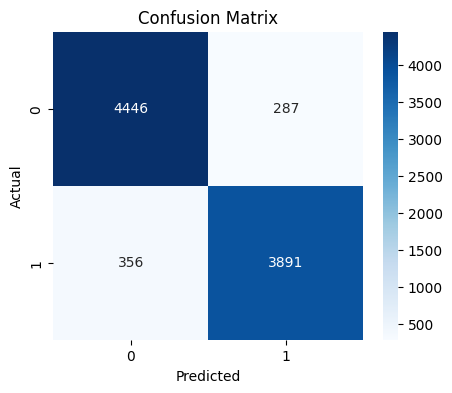

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
def predict_news(text):
    text_clean = clean_text(text)
    text_vector = vectorizer.transform([text_clean])
    prediction = model.predict(text_vector)
    return "Real" if prediction[0] == 1 else "Fake"


predict_news("Breaking News: Government launches new education initiative to boost AI literacy.")


'Real'

In [ ]:
predict_news("Breaking: Scientists discover aliens living on Mars with secret government alliance.")


'Fake'